In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import integrate

In [2]:
def Solucion(x):
    return -0.5*x - (1 - np.exp(2*x))/4.

In [3]:
def f(x,y):
    return x + 2*y

In [16]:
# Definimos una discretizacion

N = 5
t = np.linspace(0,1,N)
h = (t[-1]-t[0])/(N-1)

Y_ext = Solucion(t)

print(h)

0.25


In [17]:
def GetEuler(x,y,h):
    
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1

In [18]:
y1 = np.zeros(len(t))
y1[0] = 0.

In [19]:
GetEuler(t,y1,h)

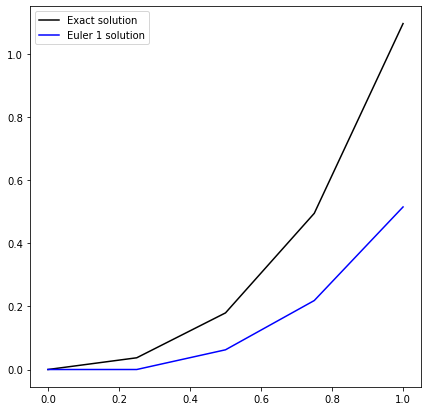

In [20]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(t,Y_ext, label='Exact solution', color='k')
ax.plot(t,y1, label='Euler 1 solution', color='b')
ax.legend()

$$ f'(z) = jz $$

In [22]:
# Estabilidad

def fc(z):
    return 1.j*z

In [23]:
def ComplexEuler():
    global t_
    global h_
    global z
    
    t_ += h_
    z  += h_*fc(z)

In [43]:
t_ = 0.
z = 1.

N = 60
h_ =  2*np.pi/float(N)

print(h_)

solution1 = np.array([t_,z])

for i in range(N):
    ComplexEuler()
    solution1 = np.vstack([solution1,np.array([t_,z])])

0.10471975511965977


In [44]:
#print(solution1)

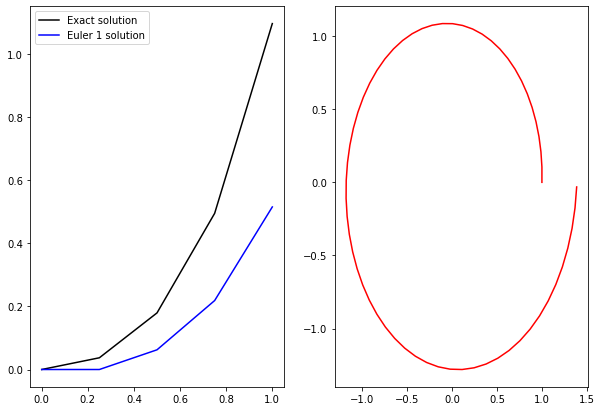

In [45]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.plot(t,Y_ext, label='Exact solution', color='k')
ax.plot(t,y1, label='Euler 1 solution', color='b')
ax1.plot( np.real(solution1[:,1]), np.imag(solution1[:,1]), color='r'  )

ax.legend()

In [46]:
def GetEuler2(x,y,t):
    
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1] + h,y[i-1] + h*k1 )
        y[i] = y[i-1] + 0.5*h*(k1+k2)

In [47]:
y2 = np.zeros(len(t))
y2[0] = 0
GetEuler2(t,y2,h)

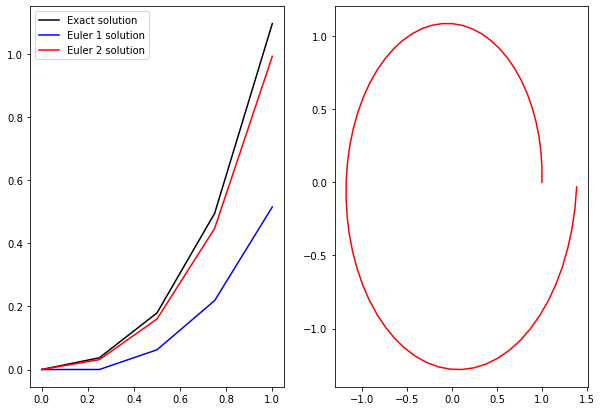

In [48]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.plot(t,Y_ext, label='Exact solution', color='k')
ax.plot(t,y1, label='Euler 1 solution', color='b')
ax.plot(t,y2, label='Euler 2 solution', color='r')
ax1.plot( np.real(solution1[:,1]), np.imag(solution1[:,1]), color='r'  )

ax.legend()

In [50]:
def ComplexEuler2():
    global t_
    global h_
    global z
    
    t_ += h_
    k1 = fc(z)
    k2 = fc(z+h_*k1)
    z += 0.5*h_*(k1+k2)

In [54]:
t_ = 0.
z = 1.

N = 30
h_ =  2*np.pi/float(N)

print(h_)

solution2 = np.array([t_,z])

for i in range(N):
    ComplexEuler2()
    solution2 = np.vstack([solution2,np.array([t_,z])])

0.20943951023931953


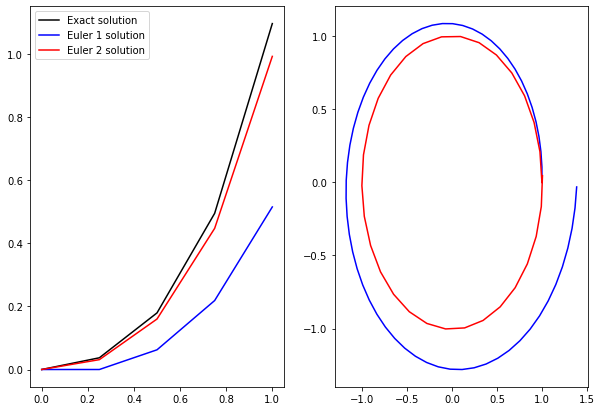

In [56]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.plot(t,Y_ext, label='Exact solution', color='k')
ax.plot(t,y1, label='Euler 1 solution', color='b')
ax.plot(t,y2, label='Euler 2 solution', color='r')
ax1.plot( np.real(solution1[:,1]), np.imag(solution1[:,1]), color='b'  )
ax1.plot( np.real(solution2[:,1]), np.imag(solution2[:,1]), color='r'  )
#ax1.set_xlim(0.9,1.1)
ax.legend()

# Sistema de ecuaciones de primer orden

In [57]:
beta = 0.002
gamma = 0.5

r0 = [1000. , 1.]

N = 50
t = np.linspace(0.,15.,N)

In [58]:
def f0(S,I,beta,gamma):
    return -beta*S*I

def f1(S,I,beta,gamma):
    return beta*S*I - gamma*I

In [59]:
def GetEuler(f0,f1,r0,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    
    S[0] = r0[0]
    I[0] = r0[1]
    
    K1 = np.zeros(2)
    
    for i in range( 1, len(t) ):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        S[i] = S[i-1] + h*K1[0]
        I[i] = I[i-1] + h*K1[1]
        
    return S,I

In [70]:
def GetEuler1(f0,f1,r0,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    
    S[0] = r0[0]
    I[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = f0(S[i-1] + h*K1[0],I[i-1] + h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1] + h*K1[0],I[i-1] + h*K1[1],beta,gamma)
              
        S[i] = S[i-1] + 0.5*h*(K1[0]+K2[0])
        I[i] = I[i-1] + 0.5*h*(K1[1]+K2[1]) 
        
    return S,I

In [71]:
S,I = GetEuler(f0,f1,r0,t)
S1,I1 = GetEuler1(f0,f1,r0,t)

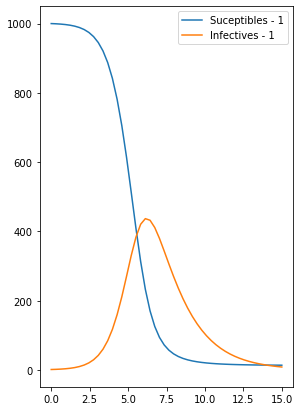

In [73]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)
ax.plot(t,S, label='Suceptibles - 1')
ax.plot(t,I, label='Infectives - 1')
ax.legend()

# Usando integrate

In [66]:
def System(r,t,beta,gamma):
    
    dsdt = - beta*r[0]*r[1]
    didt = beta*r[0]*r[1] - gamma*r[1]
    
    return [dsdt,didt]

In [67]:
r0 = [1000.,1.]
r = integrate.odeint( System, r0, t, args=(beta,gamma) )

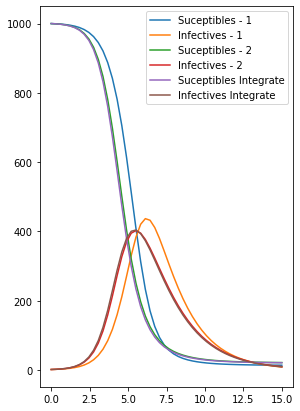

In [76]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)

ax.plot(t,S, label='Suceptibles - 1')
ax.plot(t,I, label='Infectives - 1')
ax.plot(t,S1, label='Suceptibles - 2')
ax.plot(t,I1, label='Infectives - 2')
ax.plot(t,r[:,0], label='Suceptibles Integrate')
ax.plot(t,r[:,1], label='Infectives Integrate')
ax.legend()